In [9]:
from datasets import load_from_disk, Dataset, DatasetDict
import random
import pandas as pd
import numpy as np

In [4]:
def get_avg_len(dataset):
    count = 0
    for row in dataset:
        s = row['first_sentence'] + ' ' + row['second_sentence'] + ' ' + \
            row['third_sentence'] + ' ' + \
            row['fourth_sentence'] + ' ' + row['fifth_sentence']
        count += len(s.split(' '))
    return count/len(dataset)

In [5]:
def get_lens(dataset):
    count = []
    for row in dataset:
        s = row['first_sentence'] + ' ' + row['second_sentence'] + ' ' + \
            row['third_sentence'] + ' ' + \
            row['fourth_sentence'] + ' ' + row['fifth_sentence']
        count.append(s)
    return pd.Series(count)

In [2]:
reloaded_dataset = load_from_disk('../baseline_data/category')

In [3]:
df = reloaded_dataset.to_pandas()

1619

<AxesSubplot:>

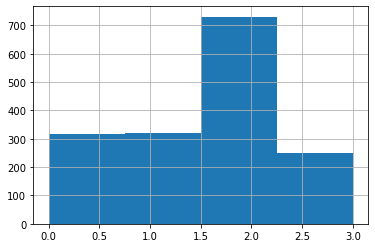

In [11]:
df['label'].hist(bins=4)

In [12]:
reloaded_dataset.features

{'fifth_sentence': Value(dtype='string', id=None),
 'first_sentence': Value(dtype='string', id=None),
 'fourth_sentence': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=4, names=['behavior_based', 'objective_based', 'emotional_based', 'goal_driven'], names_file=None, id=None),
 'second_sentence': Value(dtype='string', id=None),
 'story_id': Value(dtype='string', id=None),
 'third_sentence': Value(dtype='string', id=None)}

In [17]:
inputs = get_lens(reloaded_dataset)

<AxesSubplot:>

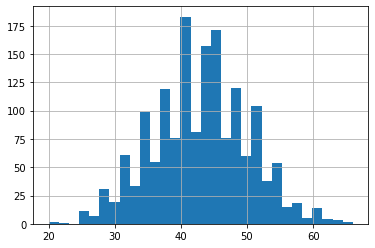

In [23]:
inputs.str.split().str.len().hist(bins=30)

In [7]:
SEED = 690

In [15]:
train_testvalid = reloaded_dataset.train_test_split(test_size=0.2, seed=SEED)

Loading cached split indices for dataset at ../baseline_data/category\cache-41fa366db8757436.arrow and ../baseline_data/category\cache-6b1a7c9642d83cc2.arrow


In [12]:
reloaded_dataset = load_from_disk('../baseline_data/importance')
train_testvalid = reloaded_dataset.train_test_split(
    test_size=0.2, seed=SEED)

test_valid = train_testvalid['test'].train_test_split(
    test_size=0.5, seed=SEED)
datasets = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'validation': test_valid['train']}
)

In [13]:
datasets

DatasetDict({
    train: Dataset({
        features: ['fifth_sentence', 'first_sentence', 'fourth_sentence', 'label', 'second_sentence', 'story_id', 'third_sentence'],
        num_rows: 859
    })
    test: Dataset({
        features: ['fifth_sentence', 'first_sentence', 'fourth_sentence', 'label', 'second_sentence', 'story_id', 'third_sentence'],
        num_rows: 108
    })
    validation: Dataset({
        features: ['fifth_sentence', 'first_sentence', 'fourth_sentence', 'label', 'second_sentence', 'story_id', 'third_sentence'],
        num_rows: 107
    })
})

In [17]:
len(df)

1295

In [18]:
df = train_testvalid['train'].to_pandas()

In [19]:
g = df.groupby('label')
te = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

In [20]:
len(te['label'])

776

In [30]:
te.reset_index(drop=True)

,story_id,first_sentence,second_sentence,third_sentence,fourth_sentence,fifth_sentence,label
0,48d93df4-f763-4964-b61c-c8a281b27257,A frog was hungry for a late dinner.,He looked across the pond and spied a fly.,The frog swam up to the fly quietly.,"Unfortunately, the fly saw him coming and buzz...",The frog was still hungry.,0
1,449c1058-fb27-4c6d-9cac-fbd5b32b80da,Billy buried some treasure in his backyard.,He drew a map so he wouldn't forget where he'd...,Years passed and Billy's family moved.,"Decades later, he went back and used his map t...",He found many treasures from his childhood.,0
2,d5f61641-8062-410d-9590-699f11ccd85a,My niece applied for a job at the RMV two Year...,She got the job and was excited.,"They told her she needed a driver's license, w...",She showed her employer a doctor's note showin...,They decided it was ok to let her work as a se...,0
3,3b074fb8-11c0-4bb5-b6eb-3a1870fd0cda,Last night I marked baked chicken.,"When I put in the oven, I walked away.",To my dismay I smelled something burnt.,I looked in the oven and the chicken was ruined.,I ordered pizza to eat instead.,0
4,1b4a915b-2c20-45de-aef6-58cfef6f6d80,Carlos decides to take a walk to get fresh air.,"Unfortunately, he slips on a wet leaf in the p...",Carlos has hurt his knee on this walk.,He limps home.,Afterwards Carlos puts a bandage on his knee.,0
...,...,...,...,...,...,...,...
771,958ba547-7970-4a46-b969-c98dec34907a,Joe and his friends had their soccer game today.,Joe was nervous.,He was nervous if he would win or not.,"Finally after the game, Joe's team won.",Joe was very proud of his team.,3
772,d5ddd22e-a842-43f0-ac12-1968e25a6692,I use Mister Spice no sodium sauce.,I am on a low sodium diet.,I tried to buy some bottles online yesterday.,"The computer kept rejecting my order, even tho...",Finally the sale went through.,3
773,2dc6ed26-4720-42e9-a27c-dc71dd1af6f9,Zeke was tired of living in America.,He decided to move to Cozumel.,He went to the Cozumel beach and bought some l...,Zeke decided to build a house on that land.,Zeke lived out his life very happy.,3
774,701cea8d-4be7-4533-a5ae-2558ea63dd4d,Johnson has never liked being outdoors very much.,His girlfriend teases him that he could never ...,Johnson decides to prove her wrong.,He packs up a tent and goes camping for a long...,"He had a miserable weekend, but told his girlf...",3


In [32]:
Dataset.from_pandas(te.reset_index(drop=True)).features

{'story_id': Value(dtype='string', id=None),
 'first_sentence': Value(dtype='string', id=None),
 'second_sentence': Value(dtype='string', id=None),
 'third_sentence': Value(dtype='string', id=None),
 'fourth_sentence': Value(dtype='string', id=None),
 'fifth_sentence': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

In [5]:
from sklearn.utils.class_weight import compute_class_weight

In [9]:
np.unique(df['label'])

array([0, 1, 2, 3], dtype=int64)

In [11]:
compute_class_weight('balanced', classes=np.unique(df['label']), y=df['label'])

array([1.27279874, 1.26484375, 0.55369357, 1.619     ])

In [10]:
from datasets import load_from_disk, Dataset
import random
import pandas as pd
import numpy as np

In [13]:
storycloze_valid = load_from_disk('../storycloze/storycloze_valid')

In [14]:
storycloze_valid.features

{'InputSentence1': Value(dtype='string', id=None),
 'InputSentence2': Value(dtype='string', id=None),
 'InputSentence3': Value(dtype='string', id=None),
 'InputSentence4': Value(dtype='string', id=None),
 'InputStoryid': Value(dtype='string', id=None),
 'RandomFifthSentenceQuiz1': Value(dtype='string', id=None),
 'RandomFifthSentenceQuiz2': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=2, names=['ending1', 'ending2'], names_file=None, id=None)}

In [20]:
len(storycloze_valid)-len(storycloze_valid)*0.1

1683.9

In [21]:
len(storycloze_valid)

1871

In [2]:
reloaded_dataset = load_from_disk('../baseline_data/importance')

In [3]:
reloaded_dataset[0]['label']

array([0, 1, 0, 0], dtype=int64)